
              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.6.0
 Built: Sep 28 2023 11:53:34

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.


Apr 05 17:22:30 NodeManager::prepare_nodes [Info]: 
    Preparing 184 nodes for simulation.

Apr 05 17:22:30 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 184
    Simulation time (ms): 17988
    Number of OpenMP threads: 1
    Not using MPI

Apr 05 17:22:31 SimulationManager::run [Info]: 
    Simulation finished.


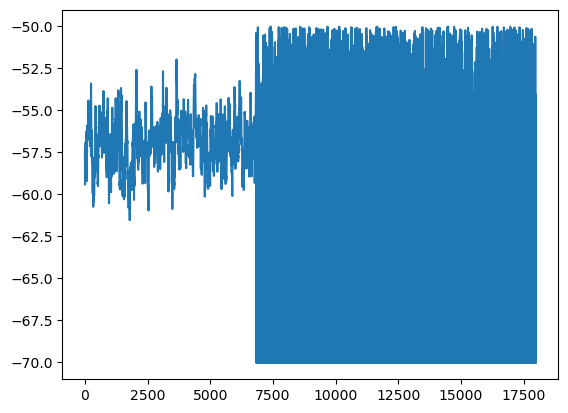

In [1]:
import pandas as pd
import numpy as np
from scripts import neuron_categorization, optimization, model, visualizations, preprocessing
import matplotlib.pyplot as plt

spike_trains = np.load('/hpc/mzhu843/modelling/nest/DATA/processed/spikes/S_3_p.npy')
calcium_traces = np.load('/hpc/mzhu843/modelling/nest/DATA/raw/calcium traces/C_3.npy')
ez_track_data = pd.read_csv('/hpc/mzhu843/modelling/nest/DATA/raw/ezytrack/behaviour_LocationOutput.csv')

categorizer = neuron_categorization.NeuronCategorizer(spike_trains, calcium_traces, ez_track_data)
categorizer.run_categorization()

weights = optimization.initialize_connectivity_matrix_normal_distribution(categorizer.get_categorized_neurons())

model = model.NeuronalNetwork(weights, categorizer.get_categorized_neurons(), G_e=4)

model.simulate()

voltages_trace_pyr = model.voltage_traces_pyr



ts = range(len(voltages_trace_pyr[2]))


plt.plot(ts, voltages_trace_pyr[2])
plt.show()










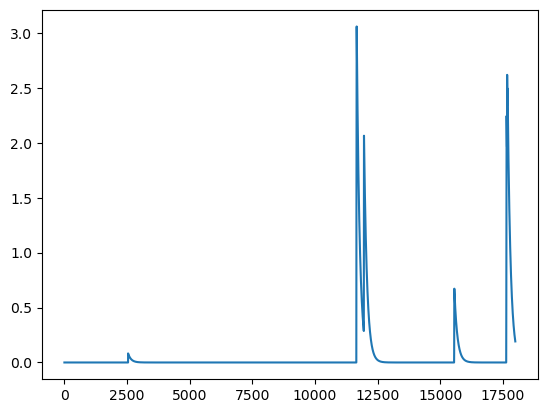

In [2]:
import numpy as np
import matplotlib.pyplot as plt

calcium = np.load('/hpc/mzhu843/modelling/nest/DATA/raw/calcium traces/C_3.npy')
plt.plot(calcium[0])


Apr 05 17:22:33 NodeManager::prepare_nodes [Info]: 
    Preparing 198 nodes for simulation.

Apr 05 17:22:33 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 198
    Simulation time (ms): 17988
    Number of OpenMP threads: 1
    Not using MPI

Apr 05 17:22:34 SimulationManager::run [Info]: 
    Simulation finished.


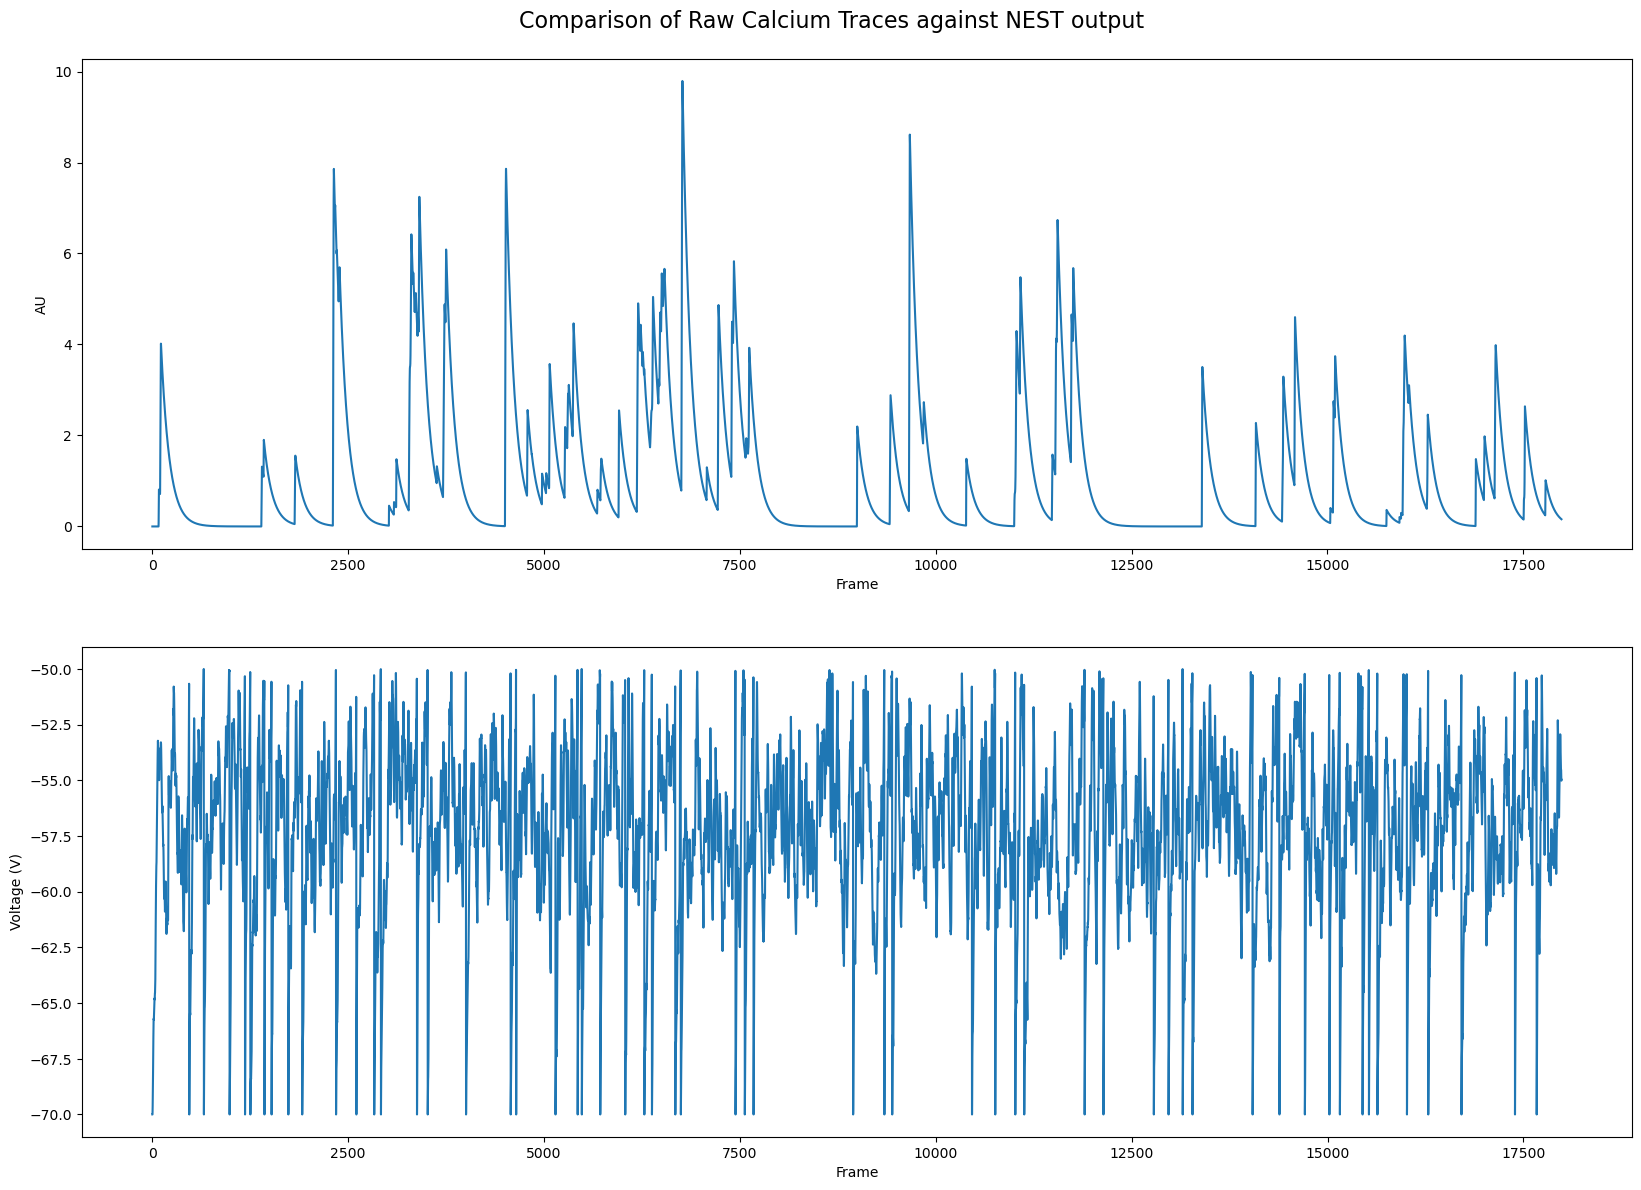

In [3]:
import numpy as np
import nest
import matplotlib.pyplot as plt

from params import pyr_hcamp_deco2012
from scripts import visualizations

calcium_trace_1 = np.load('/hpc/mzhu843/modelling/nest/DATA/raw/calcium traces/C_3.npy')[83]

pyr = nest.Create('iaf_psc_alpha', n=1, params=pyr_hcamp_deco2012.params)
external_input = nest.Create('poisson_generator', n=10)
external_input.set(rate=40)

external_parrot = nest.Create('parrot_neuron', n=1)


nest.Connect(external_input, external_parrot)
nest.Connect(external_parrot, pyr, syn_spec={'weight': 90})

Vm_recorder = nest.Create('multimeter')
Vm_recorder.set(record_from=['V_m'])
nest.Connect(Vm_recorder, pyr)

spike_recorder = nest.Create('spike_recorder')
nest.Connect(pyr, spike_recorder)

nest.Simulate(17988)

ts = Vm_recorder.get('events')['times']
vms = Vm_recorder.get('events')['V_m']
fig, axs = plt.subplots(2, 1, figsize=(20, 14))
axs[0].plot(calcium_trace_1)
axs[0].set_ylabel('AU')
axs[0].set_xlabel('Frame')


axs[1].plot(vms)
axs[1].set_ylabel('Voltage (V)')
axs[1].set_xlabel('Frame')

fig.suptitle('Comparison of Raw Calcium Traces against NEST output', y=0.915, fontsize = 16)
plt.savefig('/hpc/mzhu843/modelling/nest/plots/raw_vs_simulation.png')





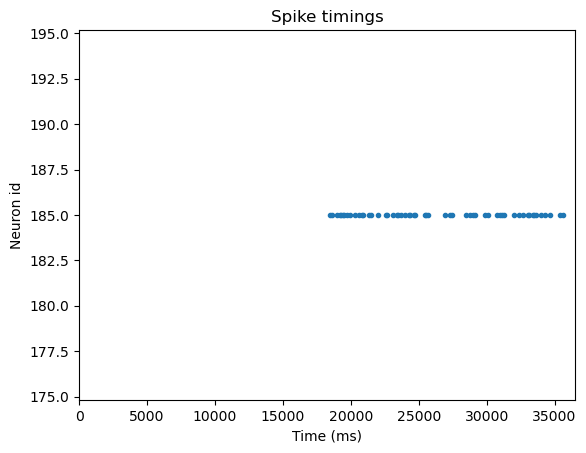

In [4]:
visualizations.plot_spikes_from_device(spike_recorder) 

In [5]:
events = Vm_recorder.get('events')['V_m']
count = 0
for num in events:
    print(num)

-70.0
-70.0
-70.0
-69.8817525544223
-69.62166208895817
-69.35918890659784
-69.14631443649006
-68.93586608665323
-68.58458416660821
-68.0613704194273
-67.53883272299431
-67.12495691623637
-66.84144461158839
-66.53380062187897
-66.19551714603534
-65.93159271317016
-65.76768990592207
-65.6963756101862
-65.69925289785371
-65.75487785976462
-65.68700002384423
-65.53890124399999
-65.41874889828051
-65.36050132479245
-65.2689816187456
-65.07266442908022
-64.90426902653175
-64.80972162261162
-64.79284698971732
-64.84146099844038
-64.82119742654486
-64.6934553152255
-64.58548481680953
-64.54003567542657
-64.54534969475667
-64.42367629318684
-64.27254660114042
-64.16019242200035
-63.923782991263124
-63.50169800777516
-63.04669832829627
-62.52891978521833
-61.968522737666056
-61.38805220216461
-60.79097231550468
-60.34230635193653
-60.048135343661784
-59.74913751445044
-59.40826920698669
-59.08452186365474
-58.897450044997825
-58.85024838426654
-58.75512962225496
-58.67590184642381
-58.3707958092

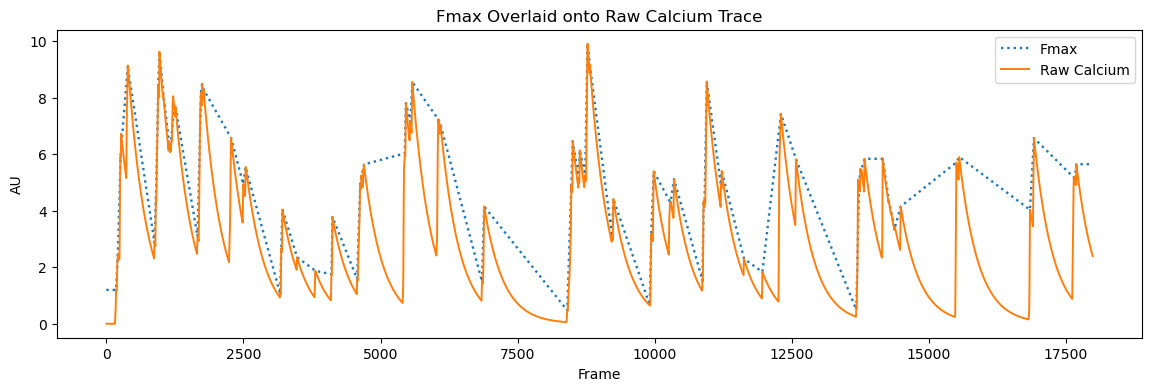

In [1]:
import numpy as np
from scripts import preprocessing
import matplotlib.pyplot as plt

spike_trains = np.load('/hpc/mzhu843/modelling/nest/DATA/processed/spikes/S_3_p.npy')

calcium_traces = np.load('/hpc/mzhu843/modelling/nest/DATA/raw/calcium traces/C_3.npy')

calcium, f_maxs = preprocessing.preprocess_calcium_data(calcium_traces, spike_trains, -50, -70, False, False)

plt.figure(figsize=(14, 4))
plt.plot(f_maxs[12], lw=1.7, label='Fmax', linestyle=':')
plt.plot(calcium_traces[12], lw=1.4, label='Raw Calcium')
plt.xlabel('Frame')
plt.ylabel('AU')
plt.title('Fmax Overlaid onto Raw Calcium Trace')
plt.legend()


plt.savefig('/hpc/mzhu843/modelling/nest/plots/fmax_overlaid_calcium_13.png')






